In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [4]:
data = pd.read_csv("data/wbes_sintetico.csv")

cols = [
    "employees",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "sales_annual_usd"
]

df = data[cols].dropna()
df.head()


,employees,training,access_finance,exporter,competition_level,sales_annual_usd
0,13.0,1.0,1.0,0,Media,42879.327130
1,9.0,0.0,0.0,0,Baja,54570.897174
2,15.0,0.0,0.0,1,Baja,56311.260030
3,25.0,1.0,0.0,1,Baja,93419.359675
4,9.0,0.0,0.0,0,Baja,24608.889361


In [5]:
promedio = df["sales_annual_usd"].mean()

df["successful"] = (df["sales_annual_usd"] > promedio).astype(int)

df["successful"].value_counts()


successful
0    652
1    428
Name: count, dtype: int64

In [6]:
X = df[[
    "employees",
    "training",
    "access_finance",
    "exporter"
]].values

y = df["successful"].values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7530864197530864


In [11]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Matriz de confusión:
 [[166  19]
 [ 61  78]]


ROC AUC: 0.8268714757923391


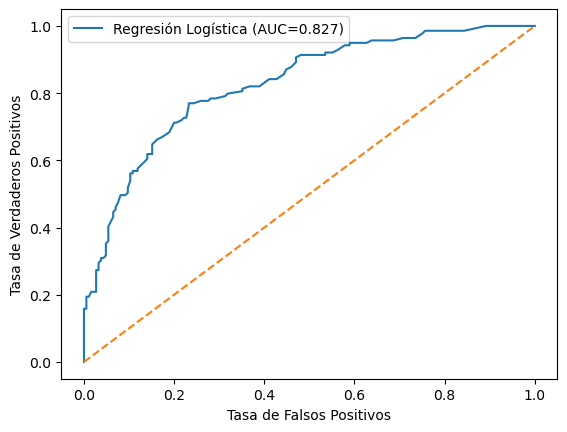

In [12]:
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Regresión Logística (AUC=%.3f)" % auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()


Existe una relación positiva entre financiamiento, capacitación y éxito empresarial.

El acceso a financiamiento permite invertir y expandir operaciones, mientras que la capacitación mejora la productividad del capital humano; ambos factores aumentan la probabilidad de que la empresa alcance mayores ventas y sea clasificada como exitosa.